In [16]:
import numpy as np
import os

In [17]:
PATH = './linearRegression_data'

In [18]:
TRAIN_LABEL_FILENAME = 'orientations_train.npy'
TRAIN_LABEL_FULL_PATH = os.path.join(PATH, TRAIN_LABEL_FILENAME)

y_train = np.load(TRAIN_LABEL_FULL_PATH)
y_train = y_train.reshape(10000, 1)

In [19]:
TRAIN_SET_FOLDER_NAME = '3dshapes_train'
TRAIN_SET_FULL_PATH = os.path.join(PATH, TRAIN_SET_FOLDER_NAME)

TRAIN_SIZE = len(os.listdir(TRAIN_SET_FULL_PATH))
X_train = np.zeros((TRAIN_SIZE, 4096))

X_train_hog_grayscale = np.zeros((TRAIN_SIZE, 1568))

In [20]:
import cv2
from skimage.feature import hog 

In [21]:
for i in range(TRAIN_SIZE):
    img = cv2.imread(os.path.join(TRAIN_SET_FULL_PATH, '{}.jpg'.format(i)))
    gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    flat_img = gray_scale.flatten()
    X_train[i] = flat_img / 255.

    hog_grayscale = hog(gray_scale, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=False)
    X_train_hog_grayscale[i] = hog_grayscale

    

In [22]:
missing_X = np.isnan(X_train)
missing_y = np.isnan(y_train)

n_missing_X = np.sum(missing_X)
n_missing_y = np.sum(missing_y)

print(f"Number of missing values in X: {n_missing_X}")
print(f"Number of missing values in y: {n_missing_y}")

Number of missing values in X: 0
Number of missing values in y: 0


In [23]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
print('X shape: ', X_train.shape)

X shape:  (10000, 4097)


In [24]:
X_train_hog_grayscale = np.hstack((np.ones((X_train_hog_grayscale.shape[0], 1)), X_train_hog_grayscale))
print('X hog grayscale shape: ', X_train_hog_grayscale.shape)

X hog grayscale shape:  (10000, 1569)


In [25]:
class LinearRegression:

    def __init__(self, alpha=0.001, lambd=0.01, max_iter=5000, tol=1e-2) -> None:
        self.alpha = alpha #learning rate
        self.lambd = lambd #regularization
        self.max_iter = max_iter
        self.tol = tol
        self.w = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.random.randn(n, 1)
        print('w shape: ', self.w.shape)
        
        prev_cost = np.inf

        for i in range(self.max_iter):
            y_pred = X.dot(self.w)

            SSE = np.sum((y_pred - y) ** 2) / 2
            L2 = self.lambd * np.sum(self.w ** 2) / 2

            cost = SSE + L2

            if abs(prev_cost - cost) < self.tol:
                break

            prev_cost = cost

            grad = X.T.dot(y_pred - y) / m + self.lambd * self.w / m
            self.w -= self.alpha * grad

        print('Number of iterations: ', i+1)

    def predict(self, X):
        return X.dot(self.w)


In [26]:
clf = LinearRegression()
clf.fit(X_train, y_train)

w shape:  (4097, 1)
Number of iterations:  5000


In [27]:
clf_hog_grayscale = LinearRegression()
clf_hog_grayscale.fit(X_train_hog_grayscale, y_train)

w shape:  (1569, 1)
Number of iterations:  5000


In [28]:
TEST_SET_FOLDER_NAME = '3dshapes_test'
TEST_SET_FULL_PATH = os.path.join(PATH, TEST_SET_FOLDER_NAME)

TEST_SIZE = len(os.listdir(TEST_SET_FULL_PATH))
X_test = np.zeros((TEST_SIZE, 4096))

X_test_hog_grayscale = np.zeros((TEST_SIZE, 1568))

In [29]:
for i in range(TEST_SIZE):
    img = cv2.imread(os.path.join(TEST_SET_FULL_PATH, '{}.jpg'.format(i)))
    gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    flat_img = gray_scale.flatten()
    X_test[i] = flat_img / 255.

    hog_grayscale = hog(gray_scale, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=False)
    X_test_hog_grayscale[i] = hog_grayscale

In [30]:
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print('X test shape: ', X_test.shape)

X test shape:  (1000, 4097)


In [31]:
X_test_hog_grayscale = np.hstack((np.ones((X_test_hog_grayscale.shape[0], 1)), X_test_hog_grayscale))
print('X test hog grayscale shape: ', X_test_hog_grayscale.shape)

X test hog grayscale shape:  (1000, 1569)


In [32]:
TEST_LABEL_FILENAME = 'orientations_test.npy'
TEST_LABEL_FULL_PATH = os.path.join(PATH, TEST_LABEL_FILENAME)

y_test = np.load(TEST_LABEL_FULL_PATH)
y_test = y_test.reshape(1000, 1)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_pred_hog_grayscale = clf_hog_grayscale.predict(X_test_hog_grayscale)

In [35]:
for i in range(10):
    print(y_test[i], y_pred[i])

[25.71428571] [26.50384766]
[-12.85714286] [-14.01364471]
[-4.28571429] [-5.61827863]
[-17.14285714] [-16.35317087]
[8.57142857] [9.45288716]
[8.57142857] [8.45154567]
[4.28571429] [4.7599182]
[8.57142857] [8.5575617]
[0.] [0.44766524]
[0.] [-0.12963318]


In [36]:
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

In [37]:
rmse

2.305984864382789

In [38]:
clf.w

array([[ 1.82326344],
       [ 1.55260402],
       [-1.77574098],
       ...,
       [ 0.66858262],
       [ 0.82236852],
       [-0.57004001]])

In [39]:
rmse_hog_grayscale = np.sqrt(np.mean((y_pred_hog_grayscale - y_test) ** 2))

In [40]:
rmse_hog_grayscale

4.717590643372273

In [53]:
img = cv2.imread(os.path.join(TRAIN_SET_FULL_PATH, '2517.jpg'))
import matplotlib.pyplot as plt

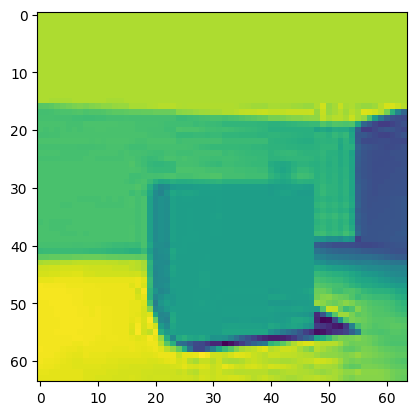

In [54]:
gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale)
plt.show()

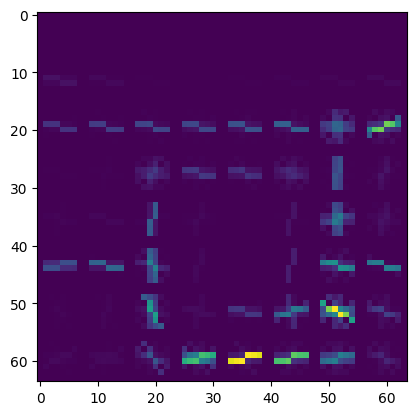

In [55]:
_, hog_img = hog(gray_scale, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True)
plt.imshow(hog_img)
plt.show()
